<a href="https://colab.research.google.com/github/Bhuvan-66/first_project/blob/main/task1_e_com.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [112]:
import pandas as pd
df=pd.read_csv("/content/ecommerce_customer_dataset.csv")
#print(df)
#print(df.to_string(index=False))
#print("identify and count the missing values:\n",df.isnull().sum())
#df_clean=df.dropna()

df["Age"].fillna(df["Age"].mean(),inplace=True)
df["Annual_Income"].fillna(df["Annual_Income"].mean(),inplace=True)
#print(type(df["Age"]))
#print(df.info())
df["Spending_Score"].fillna(df["Spending_Score"].median(),inplace=True)
df["Preferred_Category"].fillna(df["Preferred_Category"].mode()[0],inplace=True)
#print("identify and count the missing values:\n",df.isnull().sum())

#df.drop_duplicates(inplace=True)
df.drop_duplicates(keep='first')
df.to_csv("cleaned_dataset",index=False)

df_clean=pd.read_csv("/content/cleaned_dataset")
#print(df_clean.isnull().sum())
print(df_clean.describe())


       Customer_ID         Age  Annual_Income  Spending_Score  \
count   105.000000  105.000000     105.000000      105.000000   
mean     50.952381   43.242424   65157.760000       51.442857   
std      28.573246   14.276858   28790.170363       27.128550   
min       1.000000   19.000000   21802.000000        3.000000   
25%      27.000000   32.000000   39738.000000       27.000000   
50%      51.000000   43.000000   65157.760000       50.500000   
75%      75.000000   56.000000   90091.000000       66.000000   
max     100.000000   69.000000  119522.000000       98.000000   

       Purchase_Frequency  Last_Transaction_Days  
count          105.000000             105.000000  
mean             9.542857             175.647619  
std              5.830999             100.488325  
min              1.000000               5.000000  
25%              5.000000              96.000000  
50%             10.000000             177.000000  
75%             14.000000             249.000000  
max   

<ipython-input-112-b36900aaa2b4>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].mean(),inplace=True)
<ipython-input-112-b36900aaa2b4>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

In [113]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler,OneHotEncoder,LabelEncoder

df_copy=df_clean.copy()

scaler=MinMaxScaler()
df_copy[["Annual_Income","Spending_Score"]]=scaler.fit_transform(df_copy[["Annual_Income","Spending_Score"]])

#print(df_copy[["Annual_Income","Spending_Score"]].describe())

stand=StandardScaler()
df_copy["Purchase_Frequency"]=stand.fit_transform(df_copy[["Purchase_Frequency"]])

#print(df_copy["Purchase_Frequency"].mean(),df_copy["Purchase_Frequency"].std())

if 'Gender' in df_copy.columns:
  df_encode=pd.get_dummies(df_copy, columns=['Gender'])
  #print("encoding is success.")
  #print(df[['Gender']].head(10))

else:
  print("Gender column not found in the DataFrame.")
  print(df_copy.describe())

label=LabelEncoder()
df_copy["Preferred_Category"]=label.fit_transform(df_copy["Preferred_Category"])
#print(df_copy["Preferred_Category"].head(10))
#print(df_copy["Preferred_Category"].unique())

df.to_csv("transform.csv",index=False)
#print(df[["Gender"]].head)






In [114]:
df=df_clean.copy()
def customer_loyal(row):
  if row['Spending_Score']>80 and row['Purchase_Frequency']>10:
    return "HIGH"
  elif row['Spending_Score']>50 and row['Purchase_Frequency']>5:
    return "MEDIUM"
  else:
    return "LOW"

df["customer_loyal_Score"]=df.apply(customer_loyal,axis=1)

bins=[0,30000,70000,float("inf")]
labels=["low","medium","high"]
df['income_level']=pd.cut(df['Annual_Income'],bins=bins,labels=labels)

def engage_status(row):
  if row['Last_Transaction_Days']<30 and row['Purchase_Frequency']>5:
    return "Active"
  elif row['Last_Transaction_Days']<90:
    return "Dormant"
  else:
    return "churned"

df['Engagement_Status']=df.apply(engage_status,axis=1)
print(df.head(10))
print(df_clean.isnull().sum())

   Customer_ID   Age  Gender  Annual_Income  Spending_Score  \
0            1  56.0    Male        71663.0            96.0   
1            2  69.0    Male        35708.0            27.0   
2            3  46.0    Male       111906.0            63.0   
3            4  32.0    Male        69811.0            96.0   
4            5  60.0    Male        22811.0            68.0   
5            6  25.0    Male        76250.0            60.0   
6            7  38.0    Male        92082.0            50.5   
7            8  56.0  Female        54754.0            18.0   
8            9  36.0  Female       115742.0             3.0   
9           10  40.0  Female        31411.0            34.0   

   Purchase_Frequency  Last_Transaction_Days Preferred_Category  \
0                  11                     75            Grocery   
1                   5                    217            Grocery   
2                   1                    277        Electronics   
3                   8                 

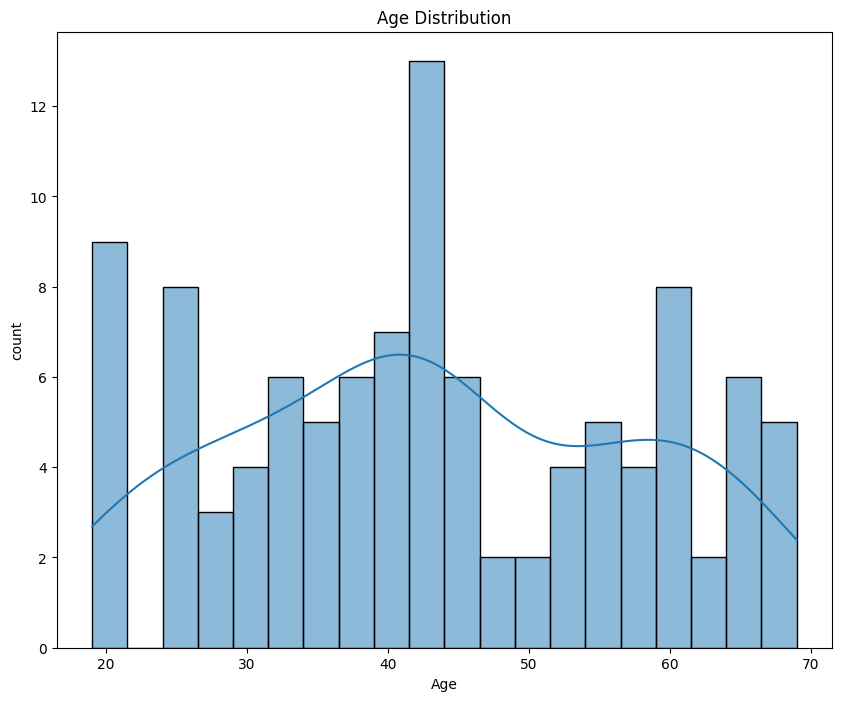

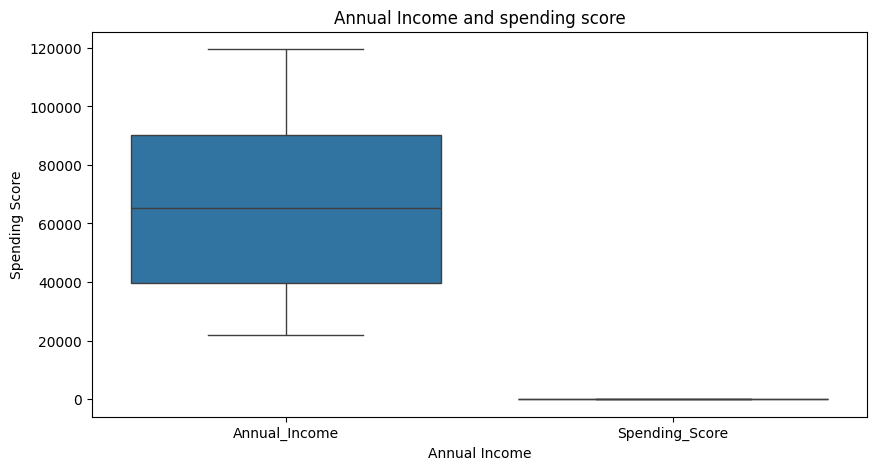

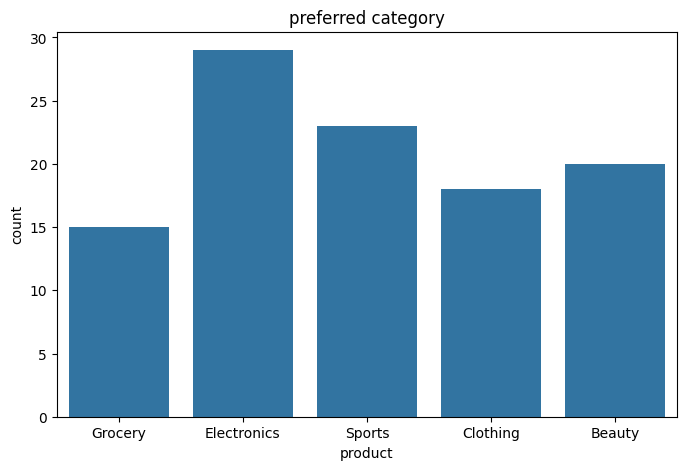

In [115]:
df=df_clean.copy()

import seaborn as sn
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
sn.histplot(df['Age'],kde=True,bins=20)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("count")
plt.show()


plt.figure(figsize=(10,5))
sn.boxplot(data=df[['Annual_Income','Spending_Score']])
plt.title("Annual Income and spending score")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()


plt.figure(figsize=(8,5))
sn.countplot(x=df['Preferred_Category'])
plt.title("preferred category")
plt.xlabel("product")
plt.ylabel("count")
plt.show()




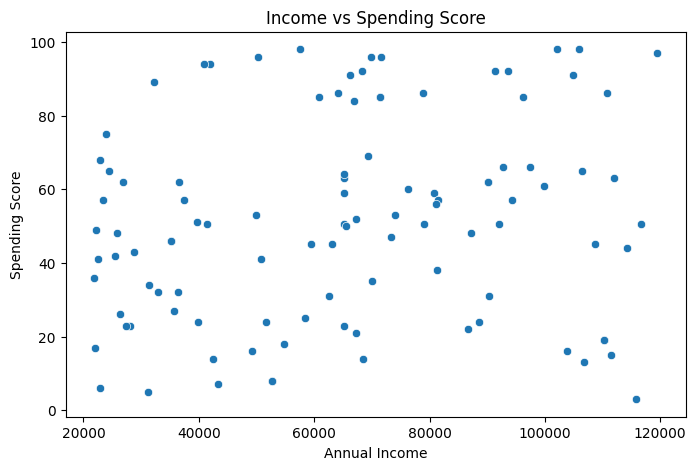

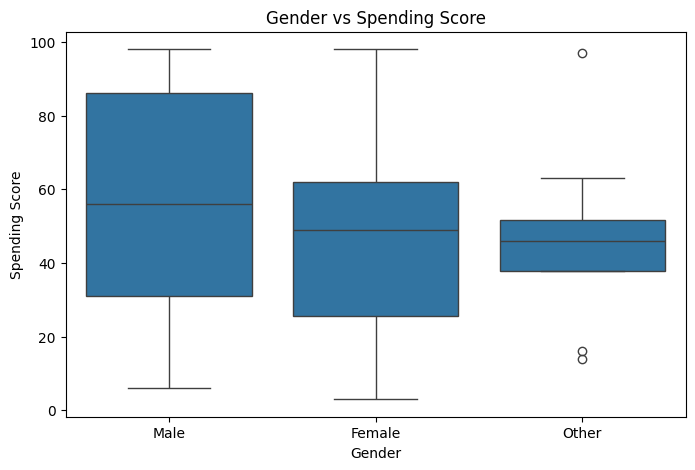

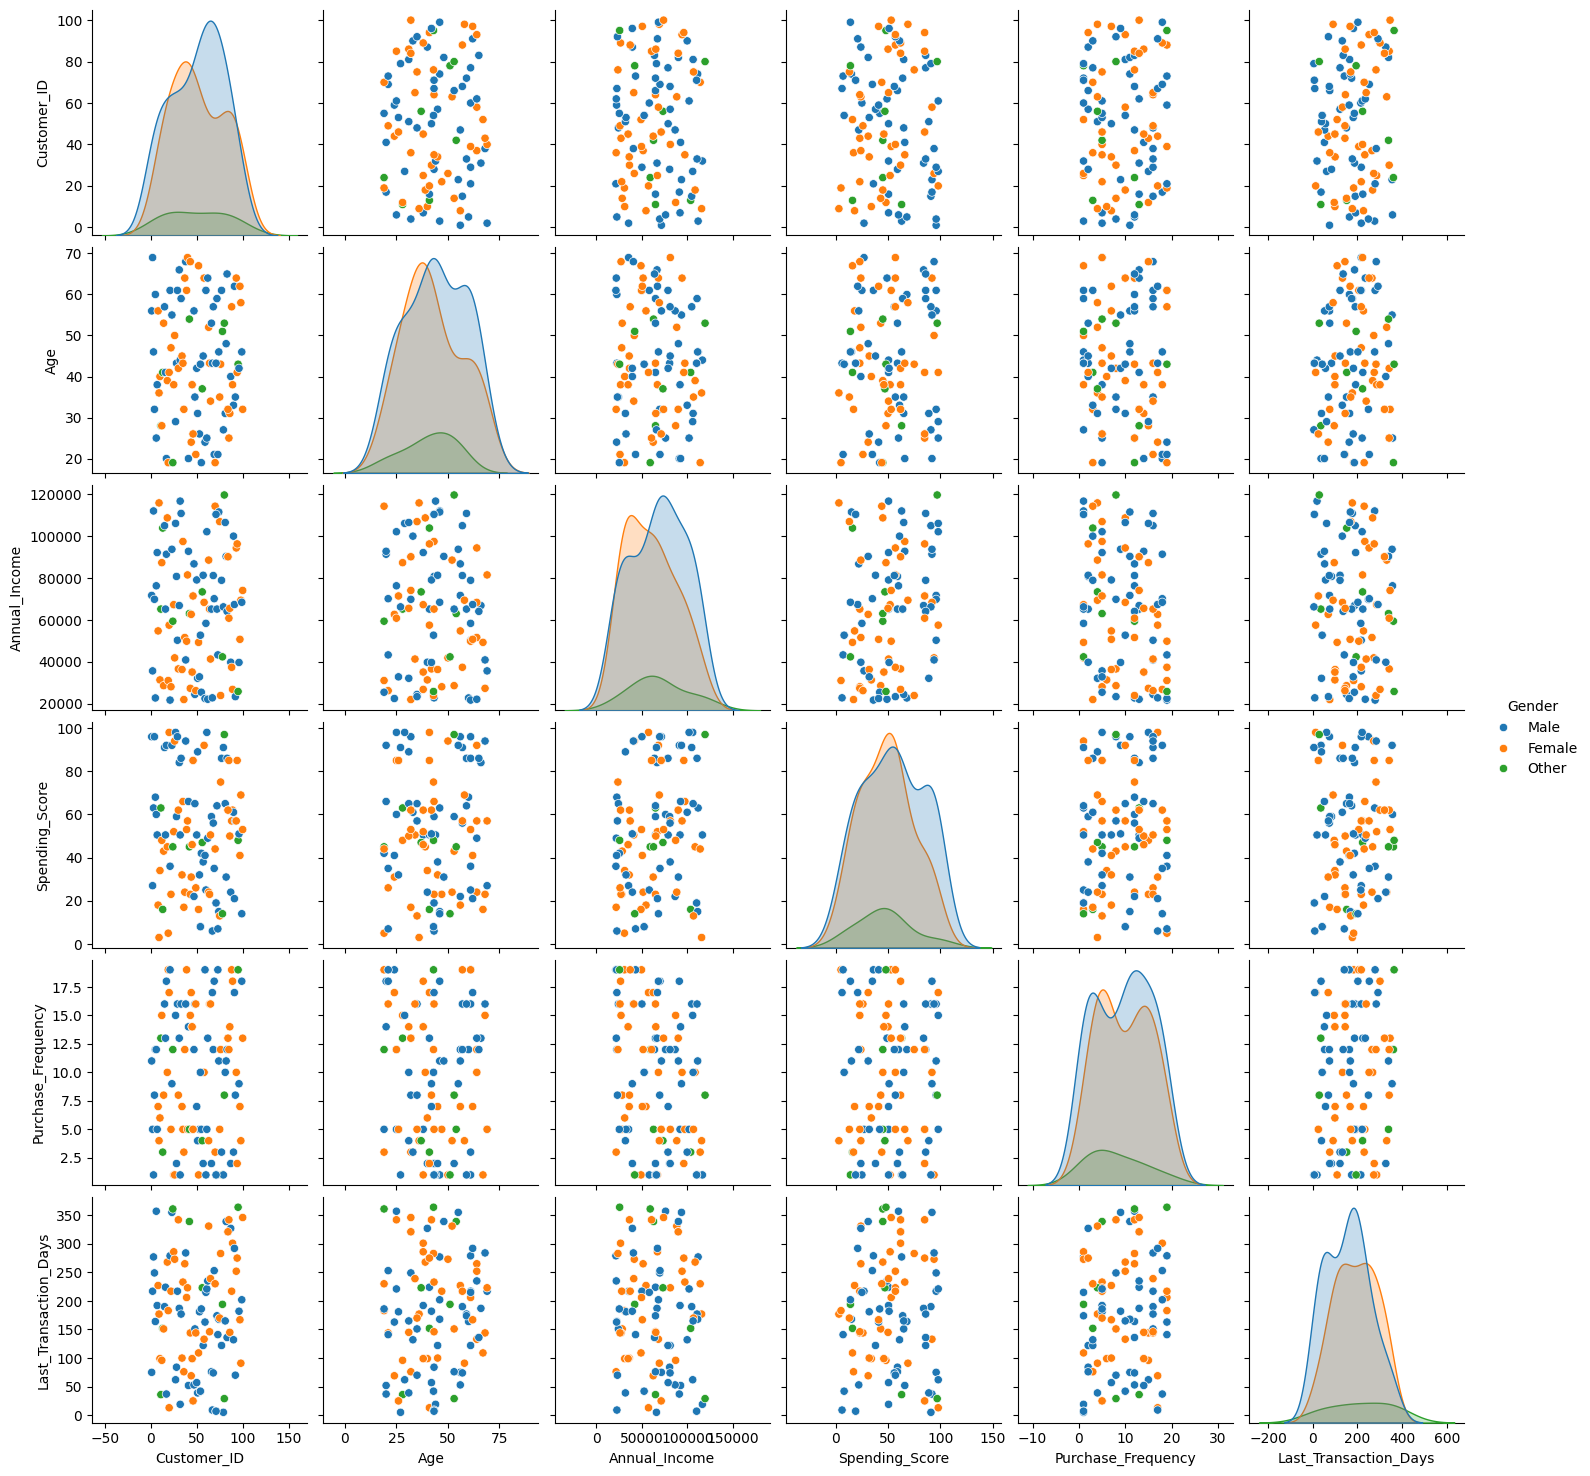

   Customer_ID   Age Gender  Annual_Income  Spending_Score  \
0            1  56.0   Male        71663.0            96.0   
1            2  69.0   Male        35708.0            27.0   
2            3  46.0   Male       111906.0            63.0   
3            4  32.0   Male        69811.0            96.0   
4            5  60.0   Male        22811.0            68.0   

   Purchase_Frequency  Last_Transaction_Days Preferred_Category  
0                  11                     75            Grocery  
1                   5                    217            Grocery  
2                   1                    277        Electronics  
3                   8                    249             Sports  
4                  12                    164           Clothing  


In [116]:
df=df_clean.copy()
plt.figure(figsize=(8, 5))
sn.scatterplot(x=df['Annual_Income'], y=df['Spending_Score'])
plt.title("Income vs Spending Score")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()


plt.figure(figsize=(8, 5))
sn.boxplot(x=df['Gender'], y=df['Spending_Score'])
plt.title("Gender vs Spending Score")
plt.xlabel("Gender")
plt.ylabel("Spending Score")
plt.show()

'''
plt.figure(figsize=(10, 6))
sn.heatmap(df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()
'''

sn.pairplot(df, hue="Gender")  # Color-coded by Gender
plt.show()
print(df_clean.head(5))

In [124]:
df=df_clean.copy()
'''
plt.figure(figsize=(8, 5))
sn.countplot(x=df["customer_loyal_Score"], order=['low', 'medium', 'high'])
plt.title("Loyalty Score Distribution")
plt.xlabel("Loyalty Score")
plt.ylabel("Count")
plt.show()
'''

df['Engagement_Status'].value_counts().plot.pie(
    autopct='%1.1f%%', figsize=(7, 7), startangle=90, colors=['blue', 'orange', 'red'])
plt.title("Customer Engagement Status Distribution")
plt.ylabel("")  # Hide y-label
plt.show()


KeyError: 'Engagement_Status'

In [126]:
import plotly.express as px
df=df_clean.copy()

fig = px.scatter(df, x='Annual_Income', y='Spending_Score',
                 color='Loyalty_Score',
                 hover_data=['Customer_ID', 'Engagement_Status'],
                 title="Customer Segmentation: Income vs Spending Score")

fig.show()


ValueError: Value of 'hover_data_1' is not the name of a column in 'data_frame'. Expected one of ['Customer_ID', 'Age', 'Gender', 'Annual_Income', 'Spending_Score', 'Purchase_Frequency', 'Last_Transaction_Days', 'Preferred_Category'] but received: Engagement_Status